In [1]:
import os 

from ivim_analysis.IVIMAnalysis import IVIMAnalysis
from ivim_analysis.n_patients import readPatientsInfo

Welcome to ivim_analysis version 1.0.0


# Parameter initialization

In [2]:
patients_info_file = '../data/10patients.txt'
zhaog_path = '/data/users/cyang/acute_pancreatitis/unprocess/ivim'

n_analysis = readPatientsInfo(patients_info_file, zhaog_path)

In [3]:
# import numpy as np

# from dipy.io.gradients import read_bvals_bvecs
# from dipy.data import get_fnames

# _, fbval, fbvec = get_fnames('ivim')

# _, bvecs = read_bvals_bvecs(fbval, fbvec)
# bvals = np.array([20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0])
# bvecs = bvecs[0:10,:]


In [4]:
from ivim_analysis.load_b_example import load_b

bvals, bvecs = load_b()

In [5]:
import pickle
import os 

output_path = "../output/pickles/ivim"

In [6]:
pickle_ivim_path = os.path.join(output_path, 'ivim_maps'+n_analysis[0].patient_id+'.pkl')

# Run analysis

/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)
  0%|          | 0/65536 [00:00<?, ?it/s]

/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:381: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals >=
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:376: RuntimeWarning: divide by zero encountered in log
  -np.log(data[self.gtab.bvals <=
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:434: UserWarning: x0 obtained from linear fitting is not feasible as initial guess for leastsq while estimating f and D_star. Using parameters from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:507: UserWarning: x0 is unfeasible for leastsq fitting. Returning x0 values from the linear fit.
  warnings.warn(warningMsg, UserWarning)
/home/cyang/anaconda3/envs/dipy/lib/python3.9/site-packages/dipy/reconst/ivim.py:344: UserWarning: Bounds are violated for leastsq fitting. Returning param

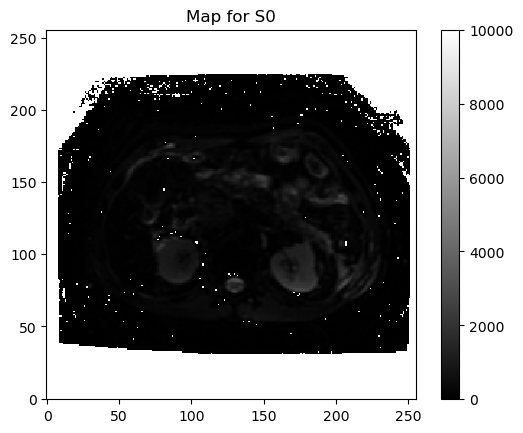

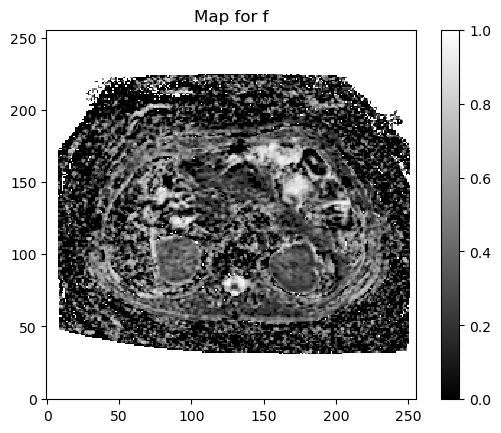

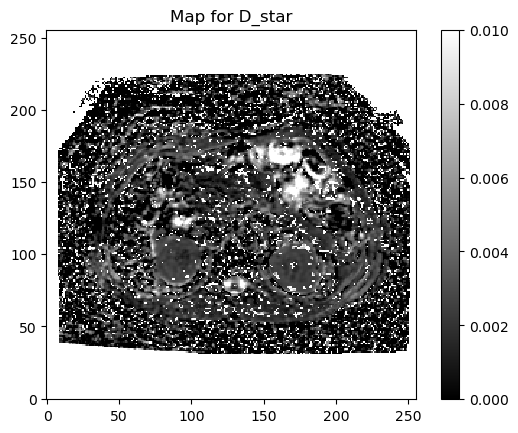

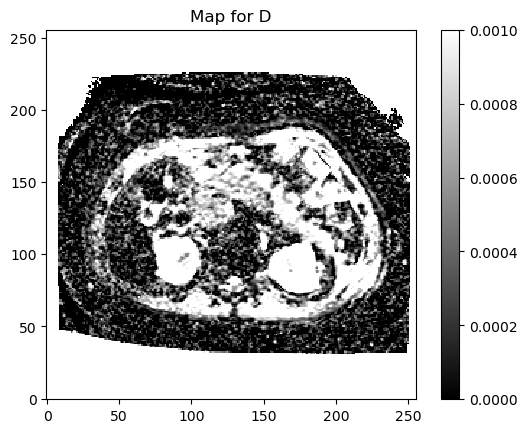

In [7]:
n_analysis[0].run_analysis(bvals, bvecs, save_ivim_params=True)

In [8]:
n_analysis[0].ivim_params_maps == None

False

In [9]:
# n_analysis[0].ivim_params_maps == IVIMAnalysis.param_maps()

Loading data from pickle file


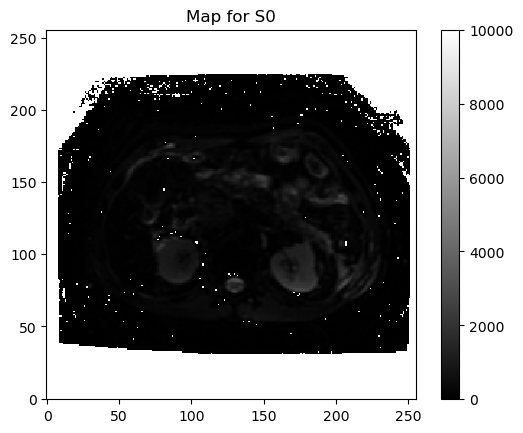

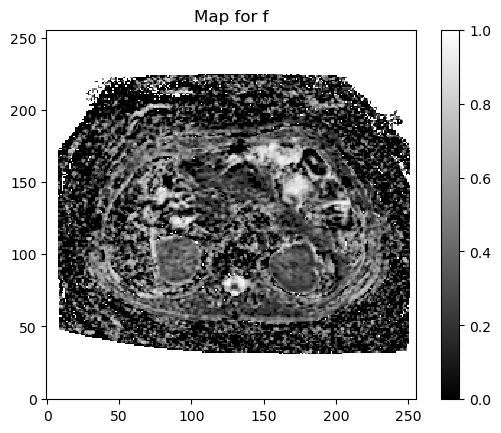

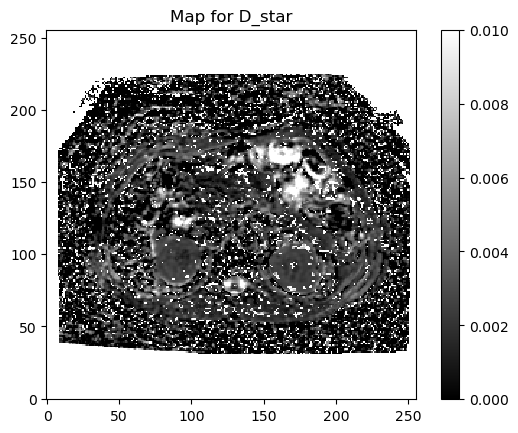

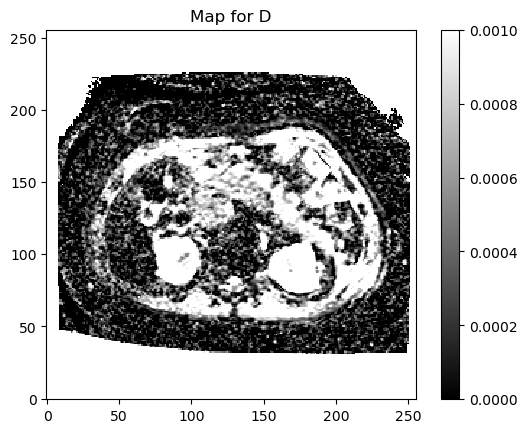

In [10]:
n_analysis[0].run_analysis(bvals=bvals, bvecs=bvecs, load_from_pickle=True, pickle_ivim_path=pickle_ivim_path)

# Plot

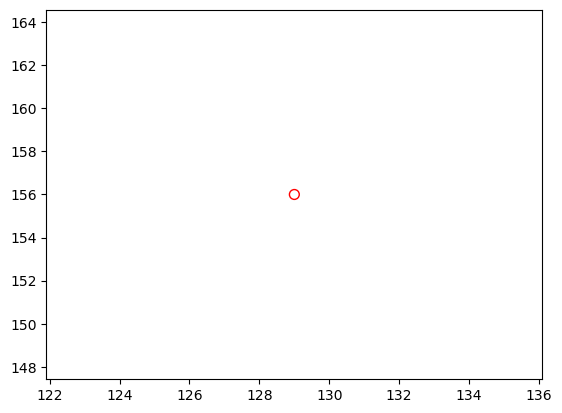

In [11]:
n_analysis[0].plt_circle_roi()

10


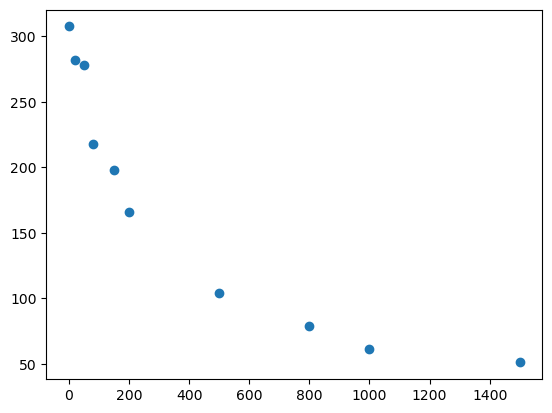

In [12]:
n_analysis[0].plot_b_intensities()

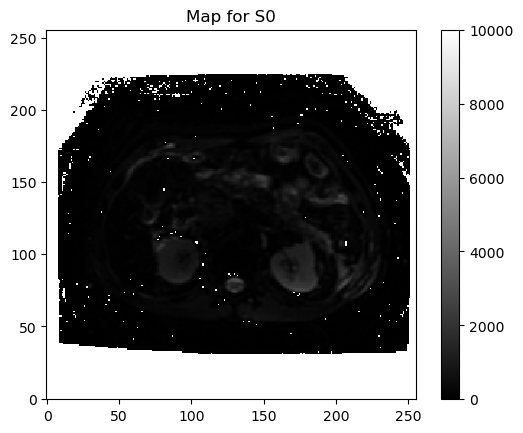

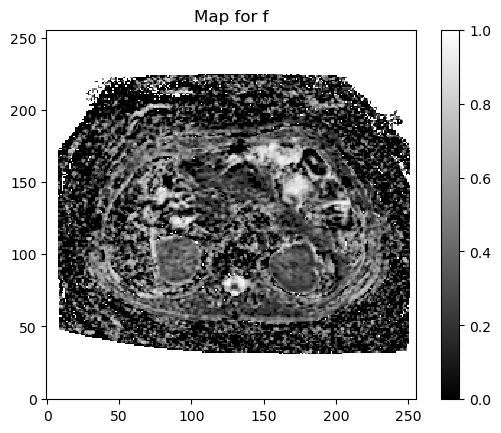

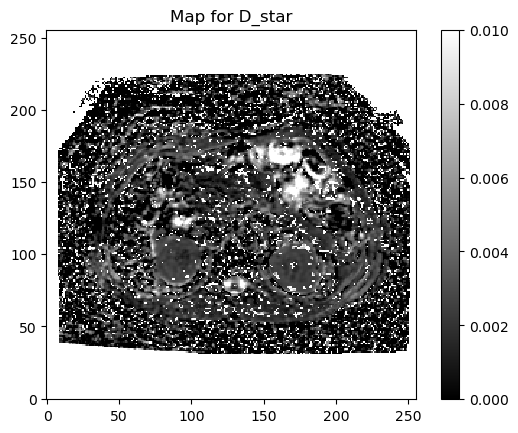

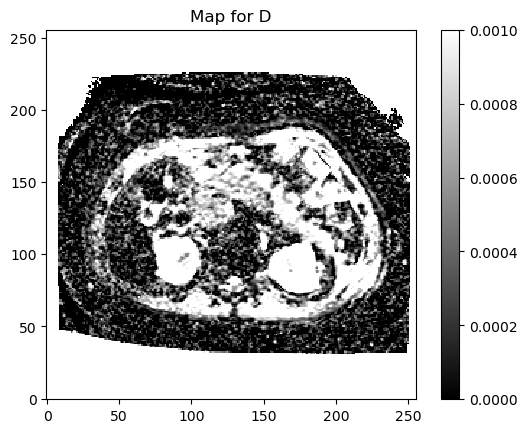

In [13]:
n_analysis[0].plot_maps()

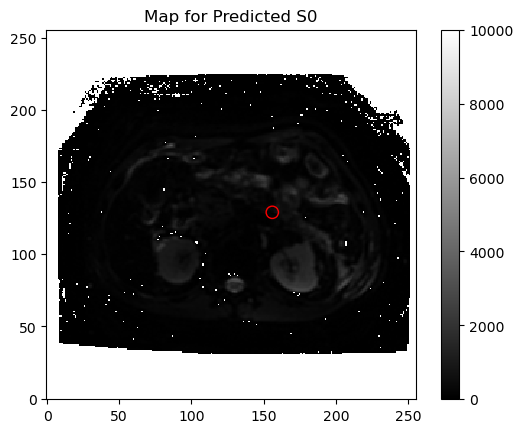

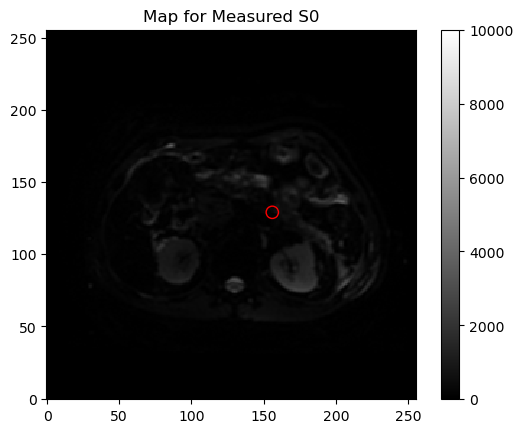

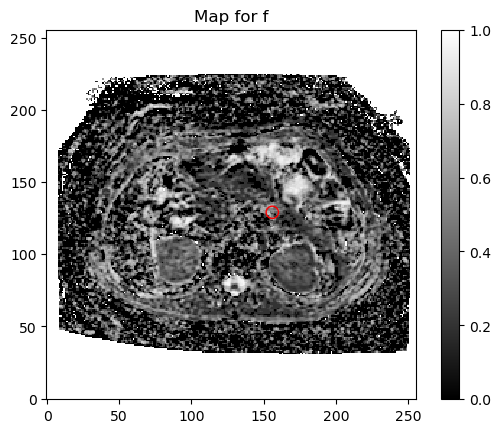

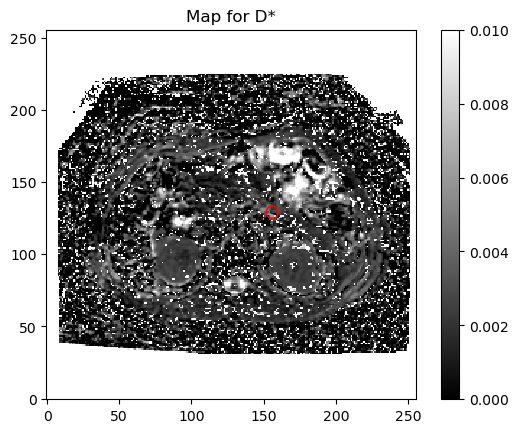

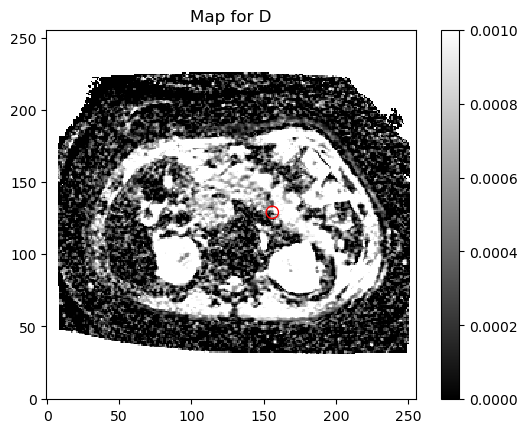

In [14]:
n_analysis[0].plot_maps_roi()

In [15]:
n_analysis[0].estimated_params_of_roi(True)

Estimated parameter: 299.98519555414026
Estimated parameter: 0.5021280586589866
Estimated parameter: 0.004528084293456637
Estimated parameter: 0.0006296268369790399


[299.98519555414026,
 0.5021280586589866,
 0.004528084293456637,
 0.0006296268369790399]

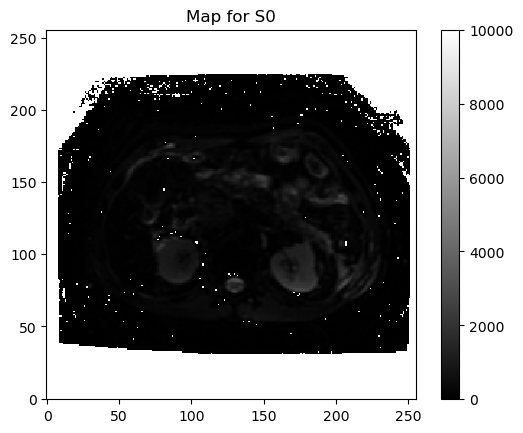

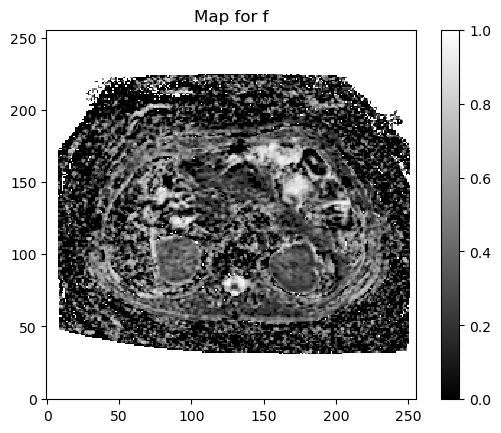

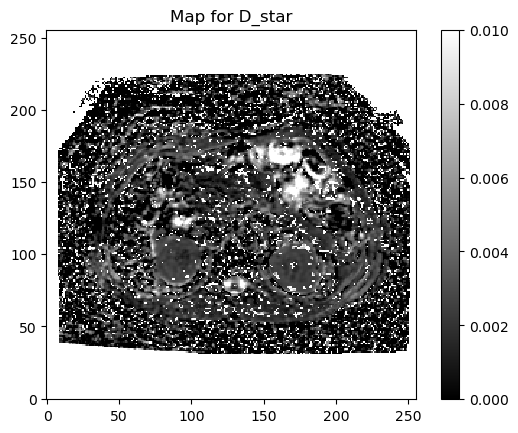

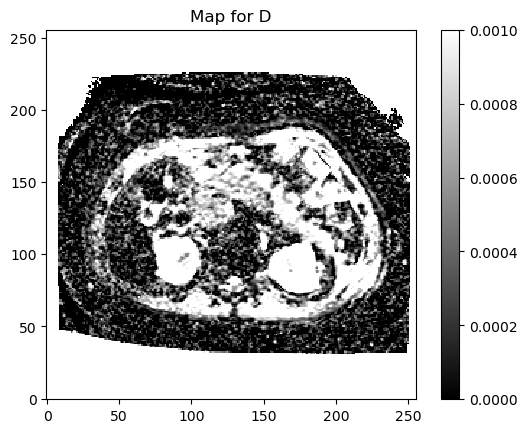

In [17]:
n_analysis[0].plot_maps()

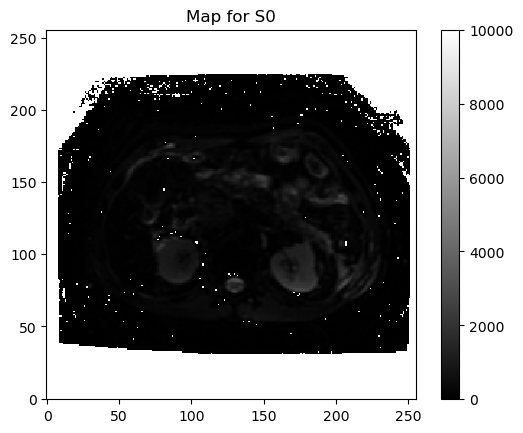

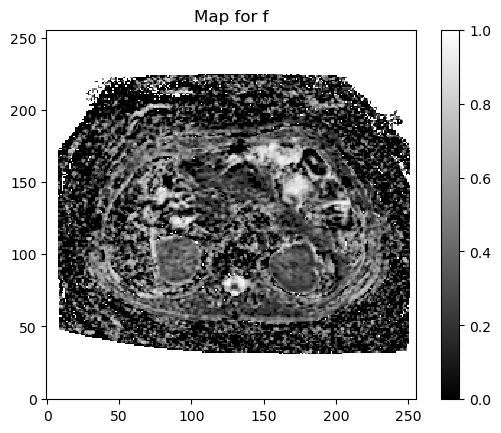

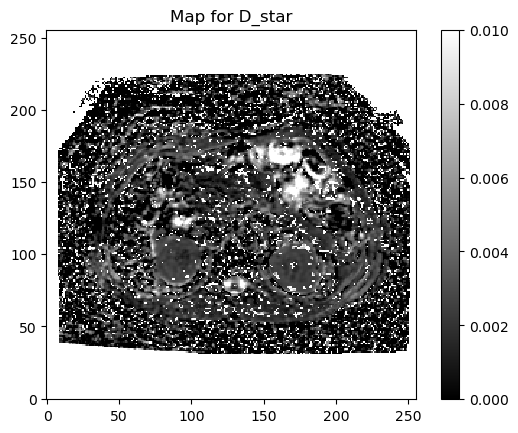

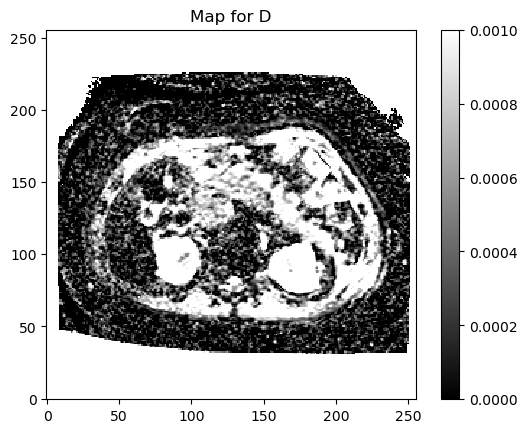

In [18]:
lim = [(0, 10000), (0, 1), (0, 0.01), (0, 0.001)]
for key, value, lim in zip(n_analysis[0].ivim_params_maps.__dict__.keys(), n_analysis[0].ivim_params_maps.__dict__.values(), lim):
    n_analysis[0].plot_map(value, key, lim, key)